In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import requests
import seaborn as sns
import csv
import gmaps

In [2]:
# Read merged CSV file - election results and census data
csv_path = "merged_file.csv"
merged_df = pd.read_csv(csv_path)

merged_df.head(3)

,Unnamed: 0,State,State Abbr,County,DEM Votes,GOP Votes,Total Votes,DEM %,GOP %,Total Population,...,Education (Bachelors),Education (Masters),Education (Professional),Education (Doctorate),Median Income,Income Per Capita,Median Home Value,Pop in Labor Force,Pop Not in Labor Force,Unemployed
0,0,Indiana,IN,Adams County,2802,9642,13039,0.214894,0.739474,34813.0,...,2311.0,768.0,126.0,64.0,47572.0,21173.0,114600.0,15975.0,8948.0,872.0
1,1,Indiana,IN,Allen County,55222,83801,145787,0.378785,0.574818,365565.0,...,42160.0,16367.0,4152.0,1694.0,49574.0,26058.0,116400.0,186706.0,93216.0,13152.0
2,2,Indiana,IN,Bartholomew County,9841,20637,32389,0.303838,0.637161,80203.0,...,9685.0,5255.0,499.0,632.0,55874.0,28631.0,137500.0,41710.0,21169.0,2165.0


In [3]:
merged_df.dtypes

Unnamed: 0                         int64
State                             object
State Abbr                        object
County                            object
DEM Votes                          int64
GOP Votes                          int64
Total Votes                        int64
DEM %                            float64
GOP %                            float64
Total Population                 float64
Population (White)               float64
Population (African-American)    float64
Population (Asian)               float64
Population (Hispanic)            float64
Median Age                       float64
Median Age (Male)                float64
Median Age (Female)              float64
Education (None)                 float64
Education (High School)          float64
Education (GED)                  float64
Education (Associates)           float64
Education (Bachelors)            float64
Education (Masters)              float64
Education (Professional)         float64
Education (Docto

The r-squared value is: 0.2613304659469191
y = 0.0x + 0.18


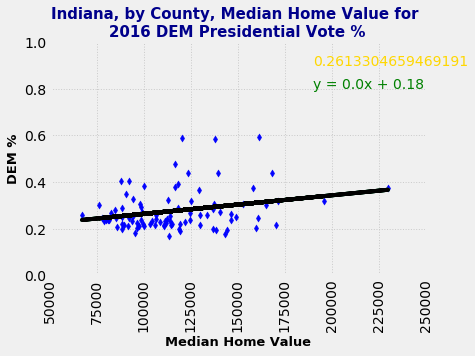

The r-squared value is: -0.2771356920887946
y = -0.0x + 0.78


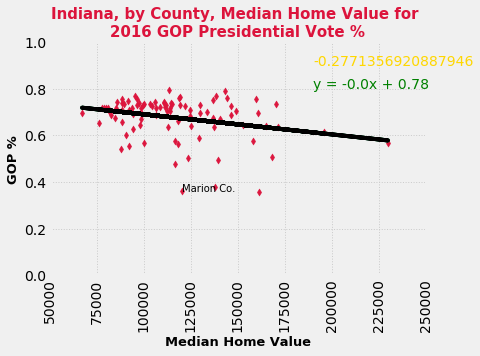

In [4]:
# Create scatterplot for Median Home Value vs. DEM %
plt.style.use('fivethirtyeight')
x_values = merged_df["Median Home Value"]
y_values = merged_df["DEM %"]
plt.title("Indiana, by County, Median Home Value for \n2016 DEM Presidential Vote %", fontsize=15, color="darkblue", weight="bold")
plt.ylabel("DEM %", fontsize=13, weight="bold")
plt.xlabel("Median Home Value", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="d",
            facecolors="blue",
           edgecolors="blue",
            s=25,
            alpha=0.99)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(50000, 250000);
plt.ylim(0, 1);

# Display & save
plt.plot(merged_df["Median Home Value"],regress_values,"black")
plt.annotate(rvalue, (190000,0.9), fontsize=14, color="gold")
plt.annotate(line_eq, (190000,0.8), fontsize=14, color="green")

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.savefig("Scatter_Median_Home_Value_vs_Dem.png")
plt.show()

# -------------------------------------------------------------------------------------------------------------------------------
# Create scatterplot for Median Home Value vs. GOP %
plt.style.use('fivethirtyeight')
x_values = merged_df["Median Home Value"]
y_values = merged_df["GOP %"]
plt.title("Indiana, by County, Median Home Value for \n2016 GOP Presidential Vote %", fontsize=15, color="crimson", weight="bold")
plt.ylabel("GOP %", fontsize=13, weight="bold")
plt.xlabel("Median Home Value", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="d",
            facecolors="crimson",
           edgecolors="crimson",
            s=25,
            alpha=0.99)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(50000, 250000);
plt.ylim(0, 1);

# Display & save
plt.plot(merged_df["Median Home Value"],regress_values,"black")
plt.annotate(rvalue, (190000,0.9), fontsize=14, color="gold")
plt.annotate(line_eq, (190000,0.8), fontsize=14, color="green")

print(f"The r-squared value is: {rvalue}")
print(line_eq)

marion=merged_df.loc[(merged_df["County"]=="Marion County")]
marion.head()
x_marion=marion["Median Home Value"][48]
y_marion=marion["GOP %"][48]
plt.annotate('Marion Co.',(x_marion,y_marion), fontsize=10)

plt.savefig("Scatter_Median_Home_Value_vs_GOP.png")
plt.show()

The r-squared value is: 0.2613304659469191
y = 0.0x + 0.18


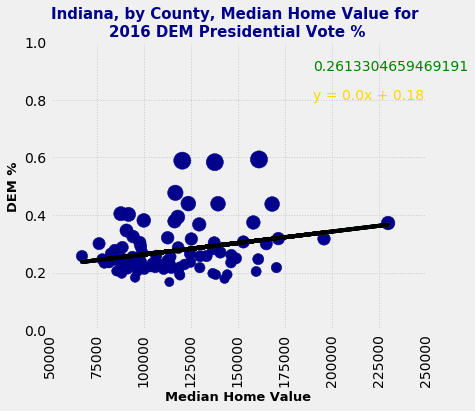

In [5]:
# Create bubble scatterplot for Median Home Value vs. DEM %
#plt.style.use('fivethirtyeight')
x_values = merged_df["Median Home Value"]
y_values = merged_df["DEM %"]
z = merged_df["DEM %"]
plt.title("Indiana, by County, Median Home Value for \n2016 DEM Presidential Vote %", fontsize=15, color="darkblue", weight="bold")
plt.ylabel("DEM %", fontsize=13, weight="bold")
plt.xlabel("Median Home Value", fontsize=13, weight="bold")


# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            s=z*500,
            marker="o",
            facecolors="darkblue",
            edgecolors="darkblue",
            #s=25,
            alpha=0.99)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")
# Set x-axis & y-axis limits
plt.xlim(50000, 250000);
plt.ylim(0, 1);

# Display & save
plt.plot(merged_df["Median Home Value"],regress_values,"black")
plt.annotate(rvalue, (190000,0.9), fontsize=14, color="green")
plt.annotate(line_eq, (190000,0.8), fontsize=14, color="gold")
plt.subplots_adjust(top=30.0)
plt.subplots_adjust(bottom=29.0)

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.savefig("Scatter_Median_Home_Value_vs_Dem.png")
plt.show()

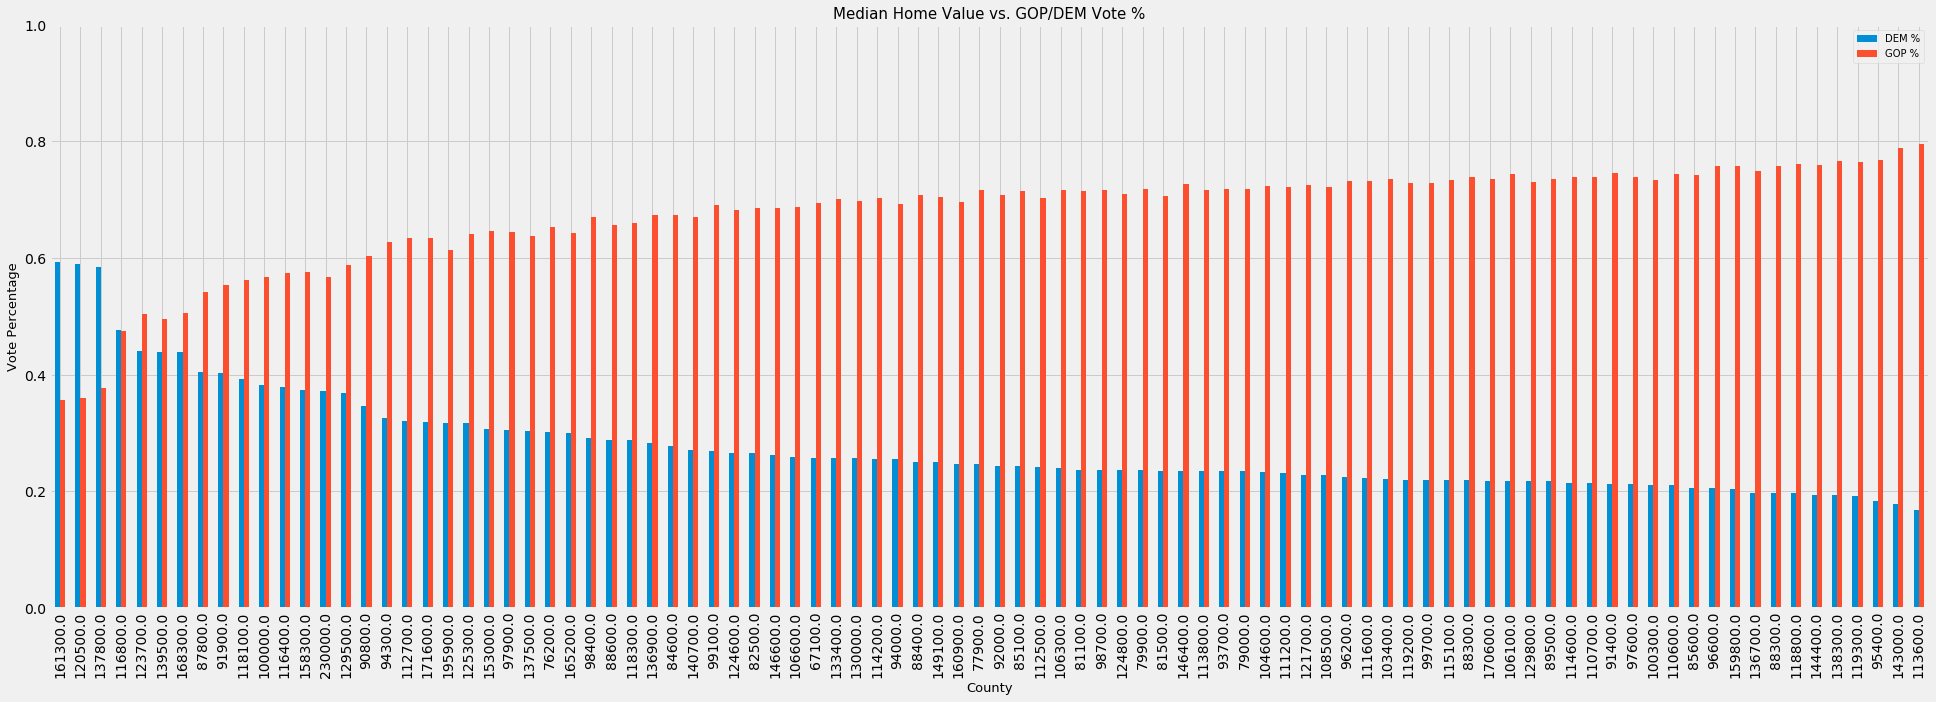

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate bar plot - Median Home Value by County with DEM % and GOP %
merged_df = merged_df.sort_values('DEM %', axis=0, ascending=False)

med_home_value = merged_df[['County', 'DEM %', 'GOP %', 'Median Home Value']]
med_home_value.plot(x='Median Home Value', kind='bar', width=0.5, figsize=(30,10))


#merged_df.sort_values('DEM %', ascending=False) #[['a','b']].plot.bar(stacked=True)


#x_axis = 

# Formatting
plt.title("Median Home Value vs. GOP/DEM Vote %", fontsize=15)
plt.xlabel("County", fontsize = 13)
plt.ylabel("Vote Percentage", fontsize = 13)
#plt.xlim(0, 500000)
plt.ylim(0, 1)
plt.legend(fontsize = 10)

#plt.xticks(x_axis, regimens)
#tick_locations = [value for value in 'x_axis']
#plt.xticks(tick_locations, [["County"]], rotation='vertical')

plt.savefig("SideBySide_Median_Home_Value_vs_Dem&GOP_Vote.png")
plt.show()
plt.tight_layout()

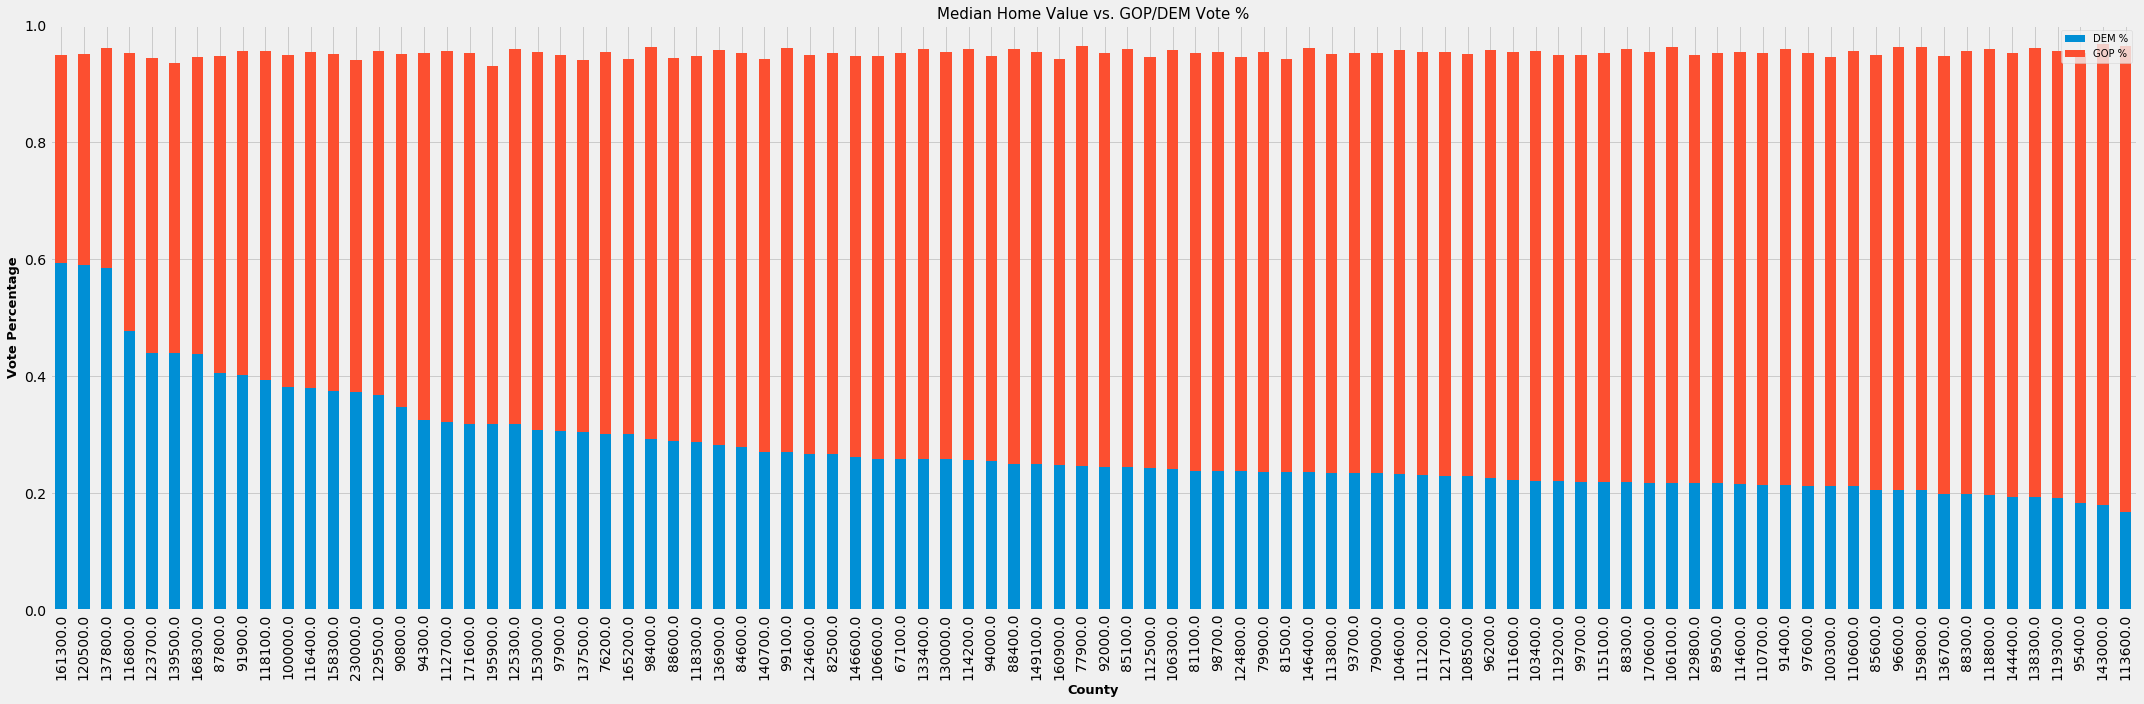

In [7]:
# Generate stacked bar plot - Median Home Value by County with DEM % and GOP %
merged_df = merged_df.sort_values('DEM %', axis=0, ascending=False)

med_home_value = merged_df[['County', 'DEM %', 'GOP %', 'Median Home Value']]
med_home_value.plot(x='Median Home Value', kind='bar', stacked=True, width=0.5, figsize=(30,10))

# Formatting
plt.title("Median Home Value vs. GOP/DEM Vote %", fontsize=15)
plt.xlabel("County", fontsize=13, weight="bold")
plt.ylabel("Vote Percentage", fontsize=13, weight="bold")
#plt.xlim(0, 250000)
plt.ylim(0, 1)
plt.legend(fontsize=10)
#plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)

#plt.xticks(x_axis, regimens)
#tick_locations = [value for value in 'x_axis']
#plt.xticks(tick_locations, [["County"]], rotation='vertical')

plt.savefig("Stacked_Median_Home_Value_vs_Dem&GOP_Vote.png")
plt.tight_layout()
plt.show()

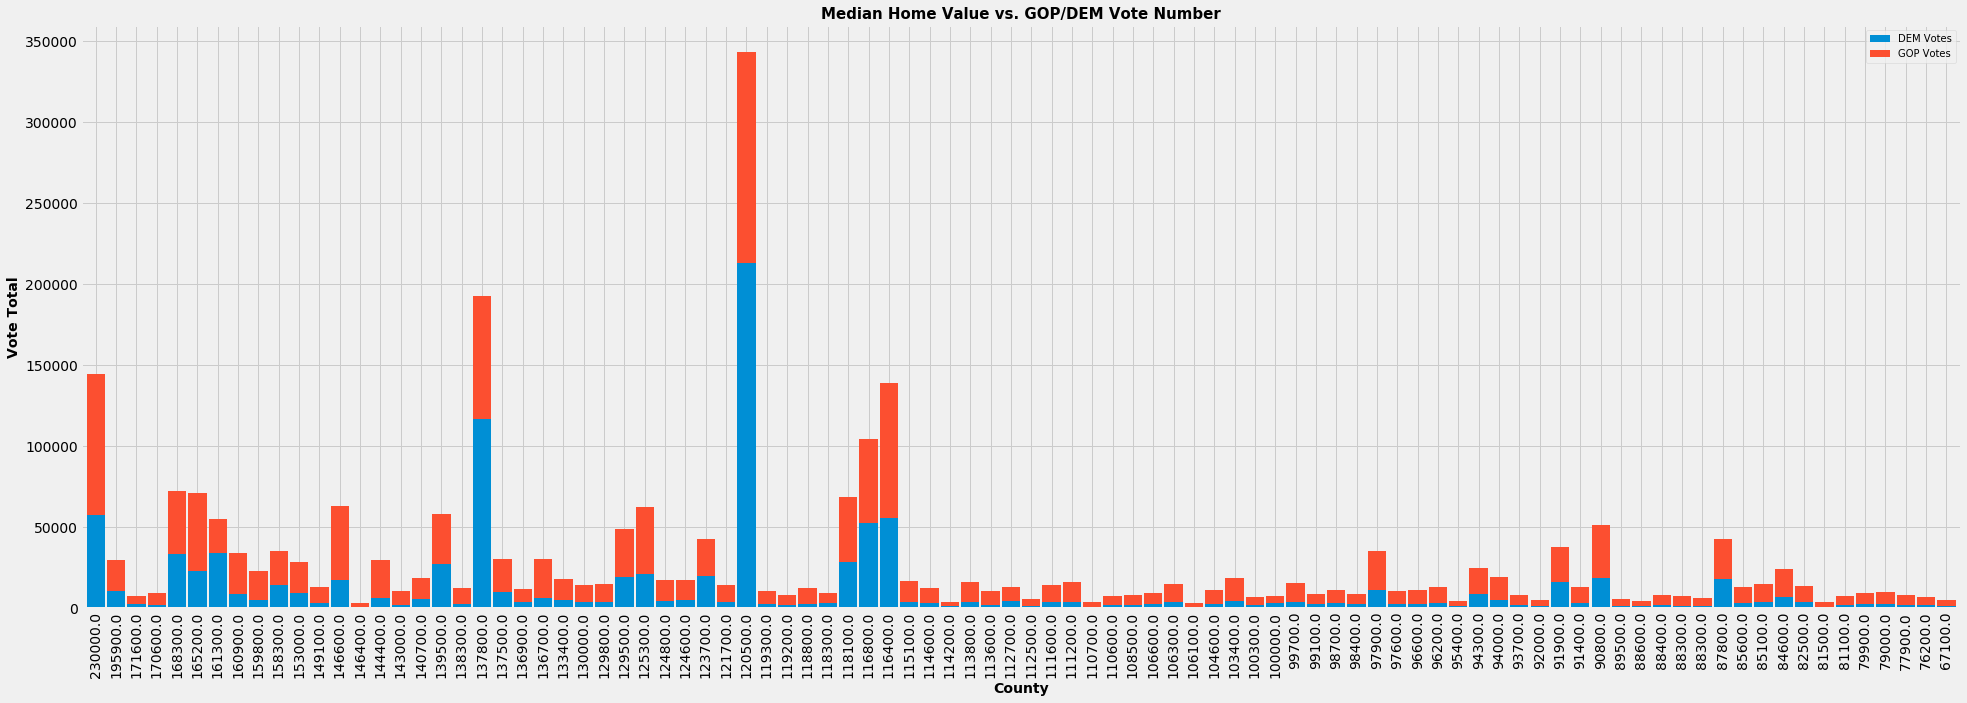

In [9]:
# Generate stacked bar plot - Median Home Value by County with DEM % and GOP %
merged_df = merged_df.sort_values('Median Home Value', axis=0, ascending=False)

med_home_value = merged_df[['County', 'DEM Votes', 'GOP Votes', 'Median Home Value']]
med_home_value.plot(x='Median Home Value', kind='bar', stacked=True, width=0.9, figsize=(30,10))

# Formatting
plt.title("Median Home Value vs. GOP/DEM Vote Number", fontsize=15, weight="bold")
plt.xlabel("County", fontsize=14, weight="bold")
plt.ylabel("Vote Total", fontsize=14, weight="bold")
#plt.xlim(0, 250000)
#plt.ylim(0, 1)
plt.legend(fontsize=10)
#fig.subplots_adjust(bottom=0.2)

#plt.xticks(x_axis, regimens)
#tick_locations = [value for value in 'x_axis']
#plt.xticks(tick_locations, [["County"]], rotation='vertical')

plt.savefig("Stacked_Median_Home_Value_vs_Dem&GOP_Vote2.png")
#plt.tight_layout()
plt.show()

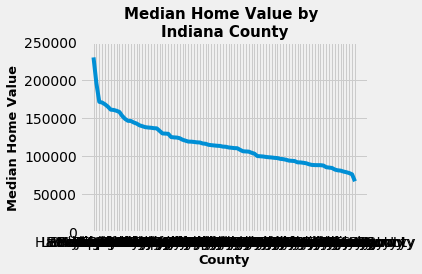

In [10]:
plt.style.use('fivethirtyeight')
x_axis = merged_df["County"]
y_axis = merged_df["Median Home Value"]

plt.plot(x_axis, y_axis)

plt.title("Median Home Value by \nIndiana County", fontsize=15, color="black", weight="bold")
plt.xlabel("County", fontsize=13, weight="bold")
plt.ylabel("Median Home Value", fontsize=13, weight="bold")

#plt.xticks(x_axis, "County")
#tick_locations = [value for value in 'x_axis']
#plt.xticks(tick_locations, rotation='vertical')
#plt.subplots_adjust(bottom=1.0)

plt.ylim(0, 250000);
plt.tight_layout(pad=1.0, w_pad=2.5, h_pad=24.0)
# Display & save
plt.savefig("Median_Home_Value_By_Indiana_County.png")

plt.show()

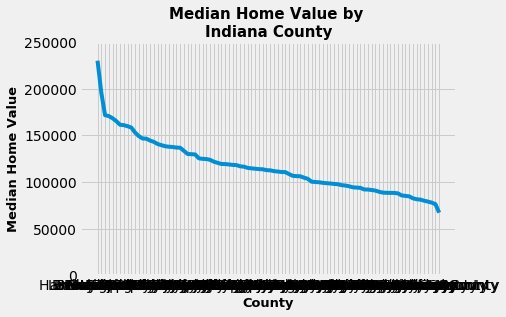

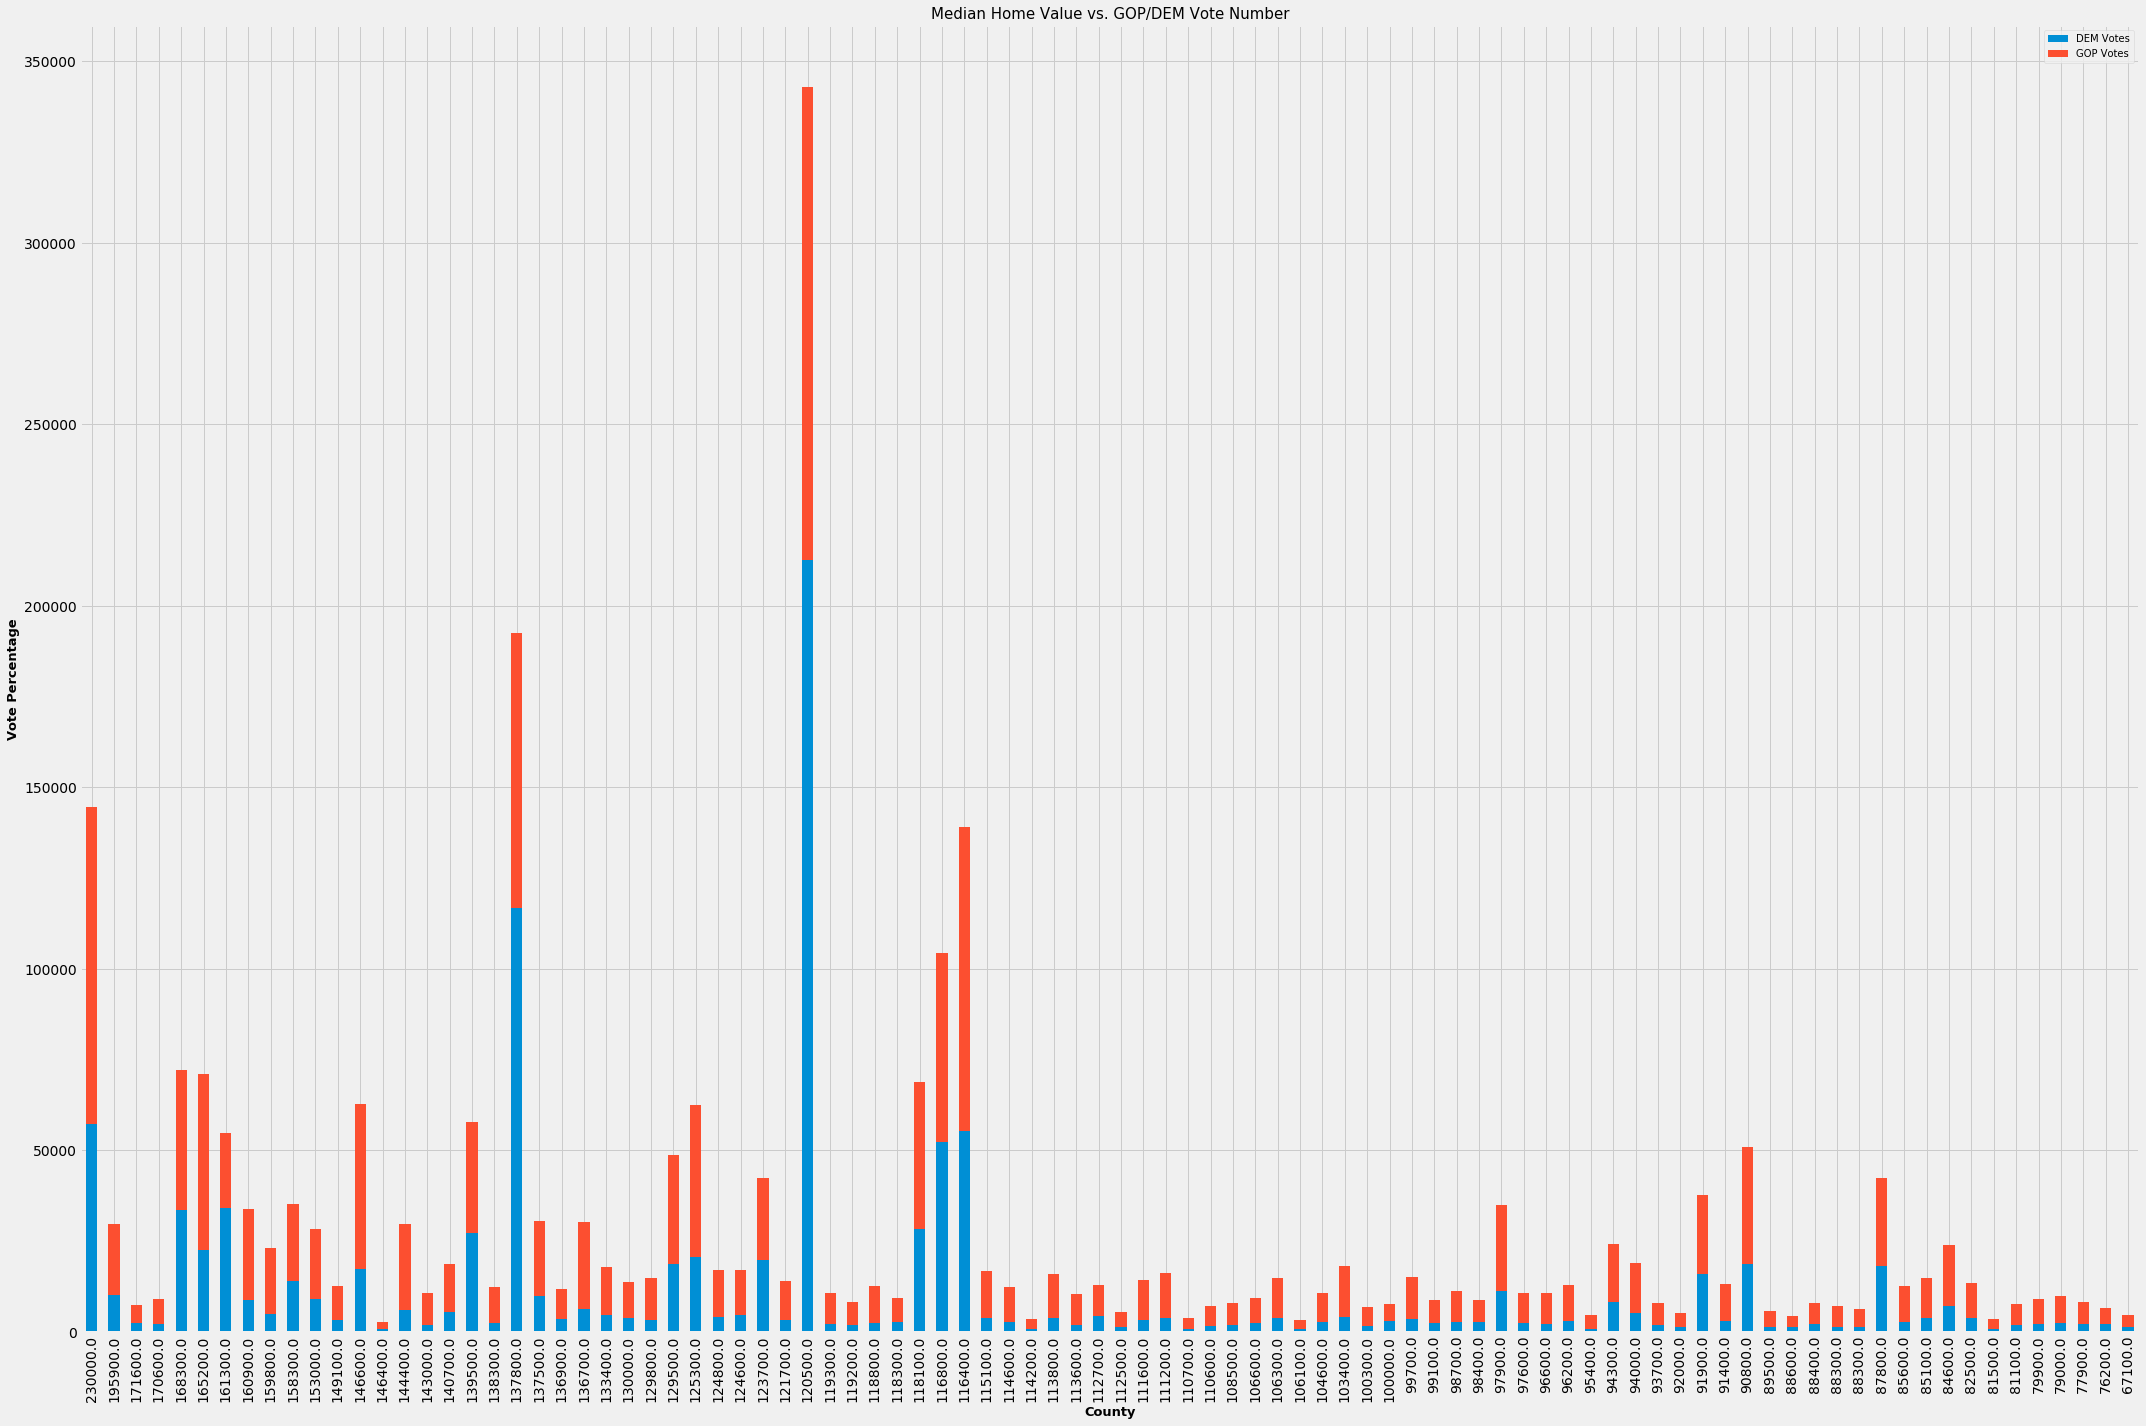

In [11]:
plt.style.use('fivethirtyeight')
x_axis = merged_df["County"]
y_axis = merged_df["Median Home Value"]

plt.plot(x_axis, y_axis)

plt.title("Median Home Value by \nIndiana County", fontsize=15, color="black", weight="bold")
plt.xlabel("County", fontsize=13, weight="bold")
plt.ylabel("Median Home Value", fontsize=13, weight="bold")

plt.ylim(0, 250000);

merged_df = merged_df.sort_values('Median Home Value', axis=0, ascending=False)

med_home_value = merged_df[['County', 'DEM Votes', 'GOP Votes', 'Median Home Value']]
med_home_value.plot(x='Median Home Value', kind='bar', stacked=True, width=0.5, figsize=(30,20))

# Formatting
plt.title("Median Home Value vs. GOP/DEM Vote Number", fontsize=15)
plt.xlabel("County", fontsize=13, weight="bold")
plt.ylabel("Vote Percentage", fontsize=13, weight="bold")
#plt.xlim(0, 250000)
#plt.ylim(0, 1)
plt.tight_layout(pad=1.0, w_pad=2.5, h_pad=15.0)
plt.legend(fontsize=10)

#plt.xticks(x_axis, regimens)
#tick_locations = [value for value in 'x_axis']
#plt.xticks(tick_locations, [["County"]], rotation='vertical')

plt.savefig("Combined.png")
#plt.tight_layout()
plt.show()